<a href="https://colab.research.google.com/github/thenukan/audio-clasification/blob/main/signal_pro_cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import matplotlib.pyplot as plt

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%matplotlib inline

In [28]:
filename = "/content/drive/MyDrive/spcup_2022_training_part1/00050dd7458cf08e594c797930696bce.wav"

In [29]:
import IPython.display as ipd
import librosa
import librosa.display

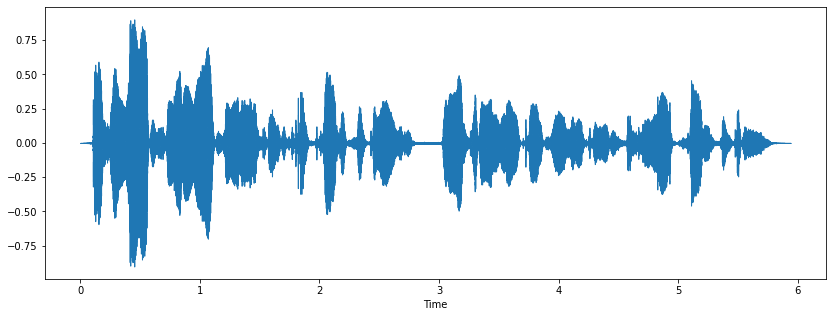

In [30]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [31]:
sample_rate

22050

In [32]:
len(data)

130977

In [33]:
import pandas as pd
metadata=pd.read_csv("/content/drive/MyDrive/Sp_cup_training_part/labels.csv")
metadata.head(10)

,track,algorithm
0,00050dd7458cf08e594c797930696bce.wav,4
1,00070e7c531000d3dddc735d107275a9.wav,2
2,000f0711027a69b7f3886c2dbcb7d41f.wav,3
3,001e28e66dee24408aaf3480dfb95fbe.wav,1
4,001eee950f60613869544b72cd48fe97.wav,2
5,001f59a6ef884e2071ba1ee52cba8d09.wav,0
6,0022a32237a11ee475c7b96d82369596.wav,3
7,0022e7014db5482004d9e6f731cfbc8b.wav,4
8,00317a6d7effa97c0dc7e1cf1b6d542d.wav,3
9,0036636e89ad53945f0f2707c09f148e.wav,1


In [34]:
metadata['algorithm'].value_counts()

4    1000
2    1000
3    1000
1    1000
0    1000
Name: algorithm, dtype: int64

In [35]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

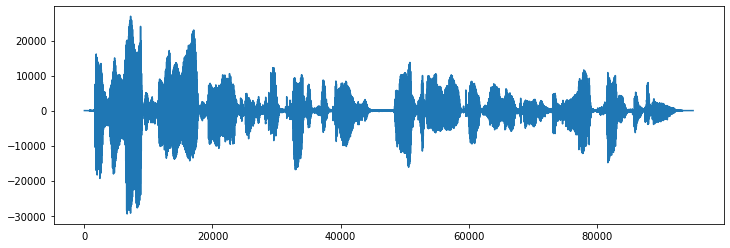

In [36]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [37]:
import numpy as np

In [38]:
def feature_extractor(file):
    data,sample_rate=librosa.load(file,res_type='kaiser_fast')
    mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)    
    mfccs_scaled_features=np.mean(mfccs.T,axis=0)
    return mfccs_scaled_features

In [39]:
data,sample_rate=librosa.load(filename,res_type='kaiser_fast')
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=20)    
mfccs_scaled_features=np.mean(mfccs.T,axis=0)
mfccs


array([[-5.5001752e+02, -5.4758813e+02, -5.3932593e+02, ...,
        -5.5041925e+02, -5.5041925e+02, -5.5041925e+02],
       [ 5.6799316e-01,  3.9965577e+00,  8.1145868e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 5.6780720e-01,  3.9752045e+00,  2.7134099e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 5.5024755e-01,  2.4670072e+00,  3.4120169e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 5.4812527e-01,  2.3421130e+00, -1.2241597e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 5.4588723e-01,  2.2218916e+00,  6.3108749e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [40]:
mfccs_scaled_features

array([-274.68332  ,  133.82632  ,  -23.235909 ,   36.61869  ,
         -9.542367 ,   -0.8149401,  -11.763956 ,   -7.777914 ,
         -3.8472211,   -8.043469 ,    1.5538738,   -5.810866 ,
         -1.6192918,   -6.2260017,   -1.2459466,  -11.479776 ,
         -8.498234 ,   -1.2163694,  -11.739869 ,   -3.2575498],
      dtype=float32)

In [41]:
import os
audio_dataset_path="/content/drive/MyDrive/spcup_2022_training_part1"

In [42]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index,row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path),str(row["track"]))
    final_class_label=row["algorithm"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_label])

5000it [31:36,  2.64it/s]


In [43]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['track','algorithm'])
extracted_features_df

,track,algorithm
0,"[-274.68332, 133.82632, -23.235909, 36.61869, ...",4
1,"[-252.77496, 117.85694, -26.044134, 42.88199, ...",2
2,"[-264.54938, 115.44371, -27.519976, 37.16627, ...",3
3,"[-254.96996, 120.667076, -38.651676, 31.026987...",1
4,"[-282.829, 124.36287, -31.122828, 49.695744, -...",2
...,...,...
4995,"[-228.97984, 151.68204, -34.857014, 56.431732,...",4
4996,"[-217.0539, 123.94098, -29.990162, 47.65532, -...",4
4997,"[-268.6948, 104.16467, -37.095306, 38.20862, -...",0
4998,"[-255.66139, 107.09716, -34.83829, 39.13665, -...",1


In [44]:
x=np.array(extracted_features_df['track'].tolist())
y=np.array(extracted_features_df['algorithm'].tolist())

In [45]:
x.shape

(5000, 40)

In [46]:
y.shape

(5000,)

In [47]:
y=np.array(pd.get_dummies(y))

In [48]:
y.shape


(5000, 5)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [51]:
num_labels=y.shape[1]


In [56]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [58]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [59]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
123/125 [============================>.] - ETA: 0s - loss: 8.9896 - accuracy: 0.2426
Epoch 1: val_loss improved from inf to 1.36451, saving model to saved_models/audio_classification.hdf5
125/125 [==============================] - 4s 7ms/step - loss: 8.8824 - accuracy: 0.2445 - val_loss: 1.3645 - val_accuracy: 0.6650
Epoch 2/100
124/125 [============================>.] - ETA: 0s - loss: 1.6031 - accuracy: 0.4032
Epoch 2: val_loss improved from 1.36451 to 1.02342, saving model to saved_models/audio_classification.hdf5
125/125 [==============================] - 1s 5ms/step - loss: 1.5981 - accuracy: 0.4050 - val_loss: 1.0234 - val_accuracy: 0.7430
Epoch 3/100
124/125 [============================>.] - ETA: 0s - loss: 1.0126 - accuracy: 0.5643
Epoch 3: val_loss improved from 1.02342 to 0.63333, saving model to saved_models/audio_classification.hdf5
125/125 [==============================] - 1s 5ms/step - loss: 1.0106 - accuracy: 0.5652 - val_loss: 0.6333 - val_accuracy: 0.8370

In [60]:
test_accuracy=model.evaluate(x_train,y_train,verbose=0)
print(test_accuracy[1])

0.9595000147819519


In [61]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.9549999833106995


In [64]:
filename="/content/drive/MyDrive/spcup_2022_training_part1/00b75d43ebb31451f80e742fdab790d7.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
prediction_feature=mfccs_scaled_features.reshape(1,-1)

In [65]:
from sklearn.preprocessing import LabelEncoder
predict_x=model.predict(prediction_feature) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[4]
